In [21]:
# Here we try to use dendrogram to segment the houses and find metrics that matter
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import sklearn

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from pylab import rcParams
import sklearn.metrics as sm

plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


df: pd.DataFrame = pd.read_csv("bigSet32000with_derrivatives.csv")


In [22]:
# These 4 variables are just enumerations of row
df.drop(['Unnamed: 0', 'Unnamed: 0.1.1', 'Unnamed: 0.2', 'Unnamed: 0.1', 'energiaKlass', 'EHR_Code']
                ,axis=1, inplace=True)
df = df[
    df['address'].str.contains("Mustamäe"
                                       or "Lasnamäe"
                                       or "Põhja-Tallinna"
                                       or "Haabersti"
                                       or "Kesklinna linnaosa")
]

data_types: dict = df.dtypes
for col_name, col_type in data_types.items():
    if np.issubdtype(object, col_type.type) :
        df.drop([col_name], axis=1, inplace=True)
    else:
        # data_frame[col_name].fillna(data_frame[col_name].mode(), inplace=True)
        df[col_name].fillna(round(df[col_name].mean(), 1), inplace=True)
df.to_csv(".\out.csv",index=False)

1233


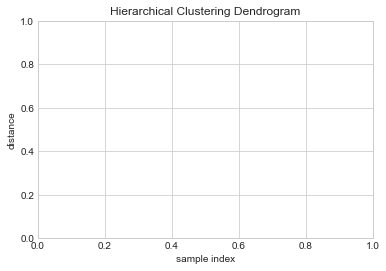

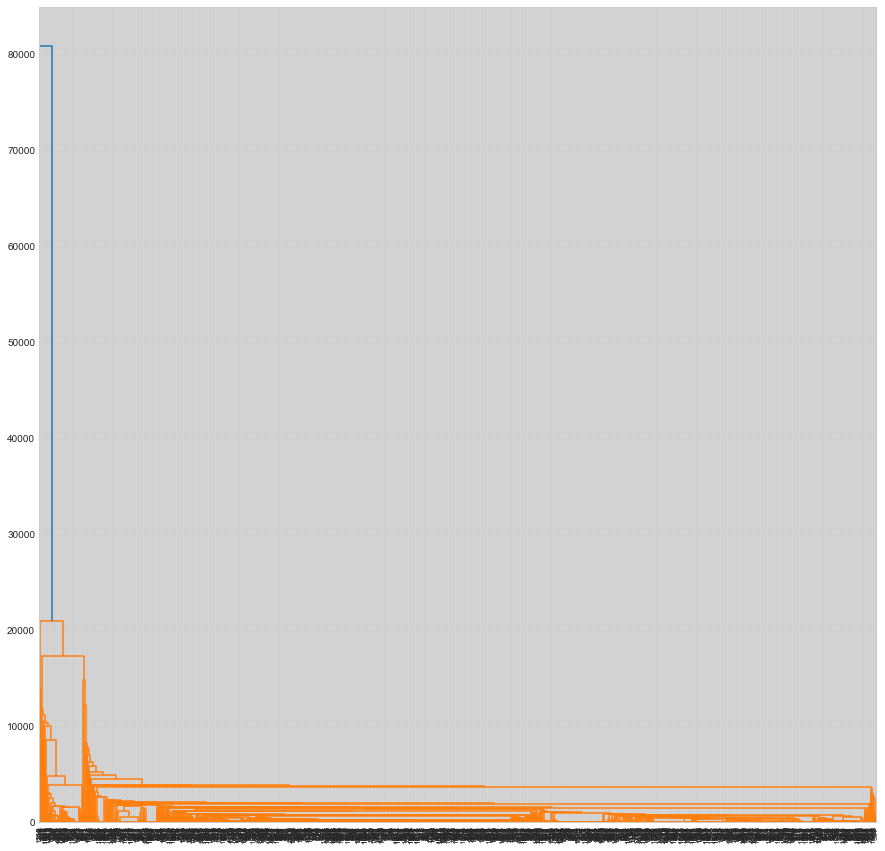

In [24]:
links = linkage(df.to_numpy(), method='single')
# https://en.wikipedia.org/wiki/Cophenetic_correlation
c, coph_dists = cophenet(links, pdist(df.to_numpy()))
print(len(links))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.subplots(figsize=(15,15))
dentogram = dendrogram(
    links,
    leaf_rotation=90.,
    leaf_font_size=8)
